In [1]:
#%matplotlib notebook

Comparison of inversion algorithm using the Cover Crop dataset
===


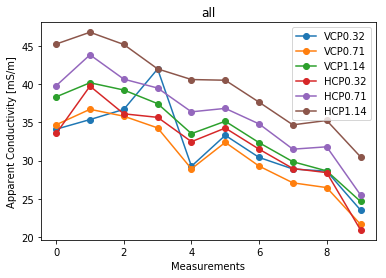

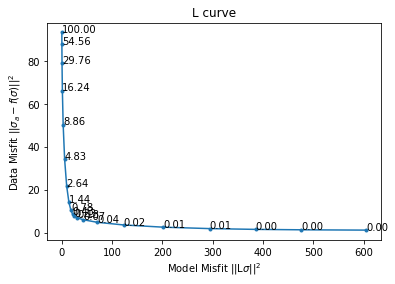

In [6]:
import sys
sys.path.append('../src/')
import numpy as np
import matplotlib.pyplot as plt
from emagpy import Problem
datadir = '../src/emagpy/test/'

k = Problem()
k.depths0 = np.array([0.2, 0.5, 0.7, 1, 1.5, 2]) # not starting at 0 !
k.conds0 = np.ones(len(k.depths0)+1)*20
k.createSurvey(datadir + 'coverCrop.csv', freq=30000)
k.surveys[0].df = k.surveys[0].df[:10]
k.show()
k.lcurve()
alpha = 0.0 # based on observation of the L-curve

Survey 1/1
1/10 inverted (converged)
2/10 inverted (converged)
3/10 inverted (converged)
4/10 inverted (converged)
5/10 inverted (converged)
6/10 inverted (converged)
7/10 inverted (converged)
8/10 inverted (converged)
9/10 inverted (converged)
10/10 inverted (converged)


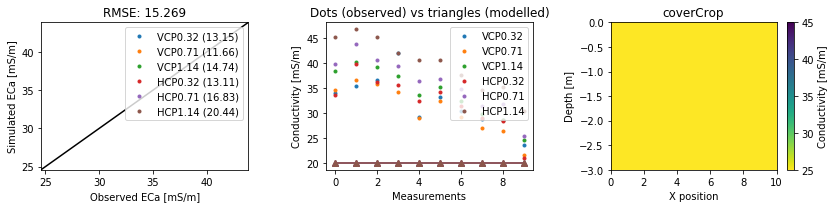

In [7]:
k.invert(method='CG', alpha=alpha, regularization='l1')
fig, axs = plt.subplots(1, 3, figsize=(12,3))
k.showOne2one(ax=axs[0])
k.showMisfit(ax=axs[1])
k.showResults(ax=axs[2], vmin=25, vmax=45)

Survey 1/1
1/10 inverted (converged)
2/10 inverted (converged)
3/10 inverted (converged)
4/10 inverted (converged)
5/10 inverted (converged)
6/10 inverted (converged)
7/10 inverted (converged)
8/10 inverted (converged)
9/10 inverted (converged)
10/10 inverted (converged)


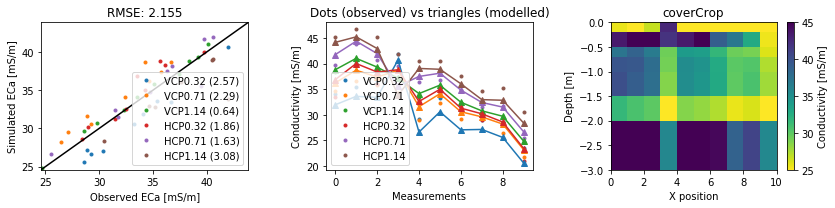

In [8]:
k.invert(alpha=alpha)
fig, axs = plt.subplots(1, 3, figsize=(12,3))
k.showOne2one(ax=axs[0])
k.showMisfit(ax=axs[1])
k.showResults(ax=axs[2], vmin=25, vmax=45)

Survey 1/1
1/10 inverted
2/10 inverted
3/10 inverted
4/10 inverted
5/10 inverted
6/10 inverted
7/10 inverted
8/10 inverted
9/10 inverted
10/10 inverted


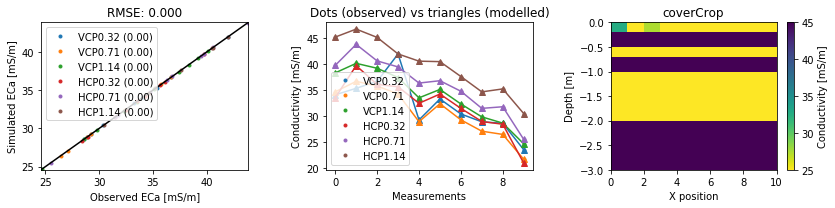

In [9]:
k.invertGN(alpha=alpha)
fig, axs = plt.subplots(1, 3, figsize=(12,3))
k.showOne2one(ax=axs[0])
k.showMisfit(ax=axs[1])
k.showResults(ax=axs[2], vmin=25, vmax=45)

Survey 1/1
1/10 inverted (converged)
2/10 inverted (converged)
3/10 inverted (converged)
4/10 inverted (converged)
5/10 inverted (converged)
6/10 inverted (converged)
7/10 inverted (converged)
8/10 inverted (converged)
9/10 inverted (converged)
10/10 inverted (converged)


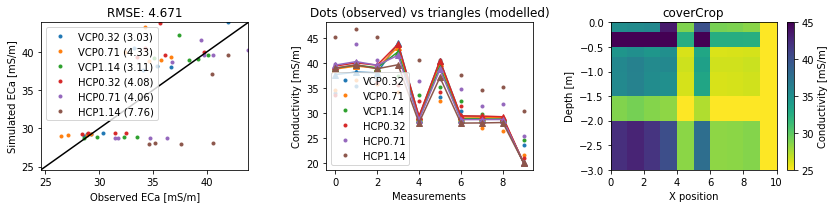

In [11]:
k.invertQ(alpha=0) # as it's in quadrature the value of alpha doesn't have the same unit
fig, axs = plt.subplots(1, 3, figsize=(12,3))
k.showOne2one(ax=axs[0])
k.showMisfit(ax=axs[1])
k.showResults(ax=axs[2], vmin=25, vmax=45)

Observations
---
- best is `invertGN()`
- `invertQ()` based on minimize the difference in quadrature is not so good

One main difference between `invertGN()` and `invert(method=CG)` is how the objective function is formulated. for `invertGN()` a traditional Gauss-Newton approach is followed where the misfit of all coils is reduced *at the same time*. While for the othe method `CG` the objective function is setup to reduce the general misfit of all the coils together. This might be while there is discrepancy between the two.

Sensitivity to $\alpha$ (smoothing) parameter
---


In [6]:
alphas = np.logspace(-4, 3, 50)
def dump(x):
    pass

Text(0, 0.5, 'Depth [m]')

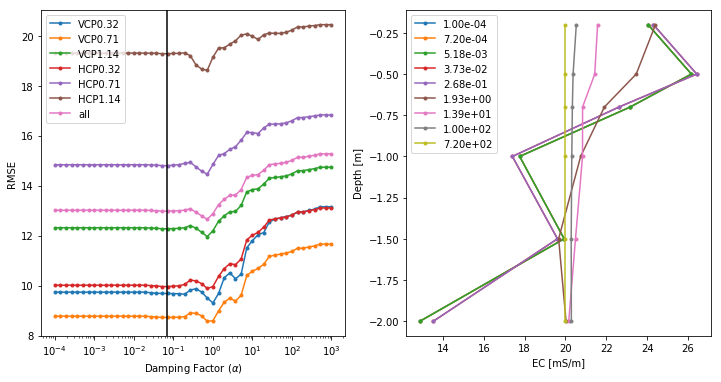

In [18]:
rmses = []
models = []
for alpha in alphas:
    k.invert(alpha=alpha, method='Nelder-Mead', dump=dump)
    rmses.append(k.getRMSE().values)
    models.append(k.models[0])
rmses = np.vstack(rmses)
models = np.dstack(models)

fig, axs = plt.subplots(1, 2, figsize=(12,6))
ax = axs[0]
ax.plot(alphas, rmses, '.-')
ax.axvline(0.07, color='k')
ax.legend(np.r_[k.coils, ['all']])
ax.set_ylabel('RMSE')
ax.set_xlabel(r'Damping Factor ($\alpha$)')
ax.set_xscale('log')
ax = axs[1]
ax.plot(models[2,:-1,::6], -k.depths0, '.-')
ax.legend(['{:.2e}'.format(a) for a in alphas][::6])
ax.set_xlabel('EC [mS/m]')
ax.set_ylabel('Depth [m]')

Text(0, 0.5, 'Depth [m]')

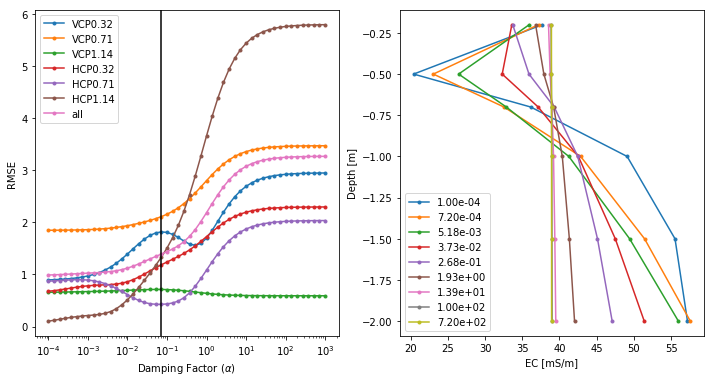

In [19]:
rmses = []
models = []
for alpha in alphas:
    k.invertGN(alpha=alpha, dump=dump)
    rmses.append(k.getRMSE().values)
    models.append(k.models[0])
rmses = np.vstack(rmses)
models = np.dstack(models)

fig, axs = plt.subplots(1, 2, figsize=(12,6))
ax = axs[0]
ax.plot(alphas, rmses, '.-')
ax.axvline(0.07, color='k')
ax.legend(np.r_[k.coils, ['all']])
ax.set_ylabel('RMSE')
ax.set_xlabel(r'Damping Factor ($\alpha$)')
ax.set_xscale('log')
ax = axs[1]
ax.plot(models[2,:-1,::6], -k.depths0, '.-')
ax.legend(['{:.2e}'.format(a) for a in alphas][::6])
ax.set_xlabel('EC [mS/m]')
ax.set_ylabel('Depth [m]')

Text(0, 0.5, 'Depth [m]')

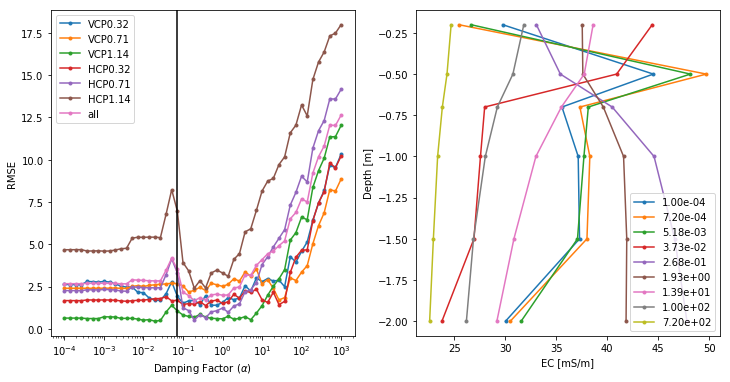

In [20]:
rmses = []
models = []
for alpha in alphas:
    k.invert(alpha=alpha, method='CG', dump=dump)
    rmses.append(k.getRMSE().values)
    models.append(k.models[0])
rmses = np.vstack(rmses)
models = np.dstack(models)

fig, axs = plt.subplots(1, 2, figsize=(12,6))
ax = axs[0]
ax.plot(alphas, rmses, '.-')
ax.axvline(0.07, color='k')
ax.legend(np.r_[k.coils, ['all']])
ax.set_ylabel('RMSE')
ax.set_xlabel(r'Damping Factor ($\alpha$)')
ax.set_xscale('log')
ax = axs[1]
ax.plot(models[2,:-1,::6], -k.depths0, '.-')
ax.legend(['{:.2e}'.format(a) for a in alphas][::6])
ax.set_xlabel('EC [mS/m]')
ax.set_ylabel('Depth [m]')

Observations
---
- `invertGN()` still winning and have much smoother curves
- the `CG` method performs better than Nelder-Mead
- the shapes of the inverted curves differ quite a bit between the different methods